In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../build/trajectory_log.csv')
print(df.describe())
df

              seq           x            y
count  500.000000  500.000000   500.000000
mean    10.000000  914.662653  1128.745352
std      5.750316    4.991878     0.021411
min      1.000000  909.382264  1128.716820
25%      5.000000  910.362427  1128.725425
50%     10.000000  913.156575  1128.745690
75%     15.000000  917.889264  1128.763242
max     19.000000  929.812851  1128.850320


,seq,x,y
0,1,909.382264,1128.76903
1,1,909.382270,1128.76903
2,1,909.382312,1128.76903
3,1,909.382428,1128.76903
4,1,909.382651,1128.76902
5,1,909.383019,1128.76902
6,1,909.383566,1128.76902
7,1,909.384327,1128.76901
8,1,909.385338,1128.76900
9,1,909.386633,1128.76899


In [2]:
last_seq = df.seq.values[0]
x=[]
y=[]
last_x = -1e9

df_vehicle = pd.DataFrame({'seq': [], 'x': [], 'y': []})


for (idx,seq) in enumerate(df.seq):
    if seq != last_seq:
        print(last_seq, seq, df.x[idx])
        df_temp = df[ (df['seq'] == last_seq) & (df.x < df.x[idx]) ]
        print(df_temp)
        df_vehicle = df_vehicle.append(df_temp)
        last_seq = seq
        

1 3 909.402256
    seq           x           y
0     1  909.382264  1128.76903
1     1  909.382270  1128.76903
2     1  909.382312  1128.76903
3     1  909.382428  1128.76903
4     1  909.382651  1128.76902
5     1  909.383019  1128.76902
6     1  909.383566  1128.76902
7     1  909.384327  1128.76901
8     1  909.385338  1128.76900
9     1  909.386633  1128.76899
10    1  909.388245  1128.76898
11    1  909.390210  1128.76896
12    1  909.392560  1128.76895
13    1  909.395329  1128.76892
14    1  909.398550  1128.76890
3 5 909.633743
    seq           x           y
50    3  909.402256  1128.76887
51    3  909.406216  1128.76884
52    3  909.410707  1128.76880
53    3  909.415756  1128.76876
54    3  909.421393  1128.76872
55    3  909.427647  1128.76867
56    3  909.434545  1128.76861
57    3  909.442115  1128.76855
58    3  909.450385  1128.76849
59    3  909.459382  1128.76842
60    3  909.469134  1128.76834
61    3  909.479667  1128.76826
62    3  909.491008  1128.76817
63    3  9

In [3]:
len(df_vehicle)
df_vehicle.head(10)

,seq,x,y
0,1.0,909.382264,1128.76903
1,1.0,909.382270,1128.76903
2,1.0,909.382312,1128.76903
3,1.0,909.382428,1128.76903
4,1.0,909.382651,1128.76902
5,1.0,909.383019,1128.76902
6,1.0,909.383566,1128.76902
7,1.0,909.384327,1128.76901
8,1.0,909.385338,1128.76900
9,1.0,909.386633,1128.76899


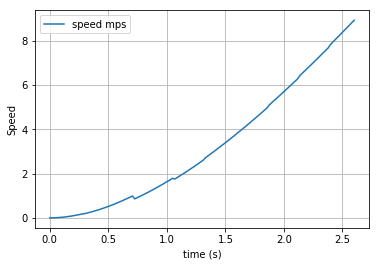

In [4]:
positions = df_vehicle.values[:,1:]
move_vector = np.diff(positions, axis=0)
dT=0.02
speed = np.sqrt(np.sum(move_vector**2, axis=1))/dT 

import matplotlib.pyplot as plt

time=np.linspace(0.0,speed.shape[0]*0.02,num=speed.shape[0])

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,speed, label='speed mps')
ax.grid('on')
ax.legend()

ax.set_xlabel('time (s)')
ax.set_ylabel('Speed')

# ax = plt.subplot(122)
# ax.plot(speed * 2.23694, label='speed mph')
# ax.legend()
# ax.grid('on')

plt.show()

In [5]:
150*0.02

3.0